# Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import time
import matplotlib.pyplot as plt
from datetime import datetime
import gc
import functions
import functions_
from collections import defaultdict

In [2]:
def updatelib():
    import importlib
    importlib.reload(functions_)

In [674]:
dfs = ['./data/2019-Oct.csv',
       './data/2019-Nov.csv',
       './data/2019-Dec.csv',
       './data/2020-Jan.csv',
       './data/2020-Feb.csv',
       './data/2020-Mar.csv',
       './data/2020-Apr.csv']

In [4]:
nov = dfs[-2]

## [RQ1]
A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing
funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?

# 1.a
What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

<Figure size 432x288 with 0 Axes>

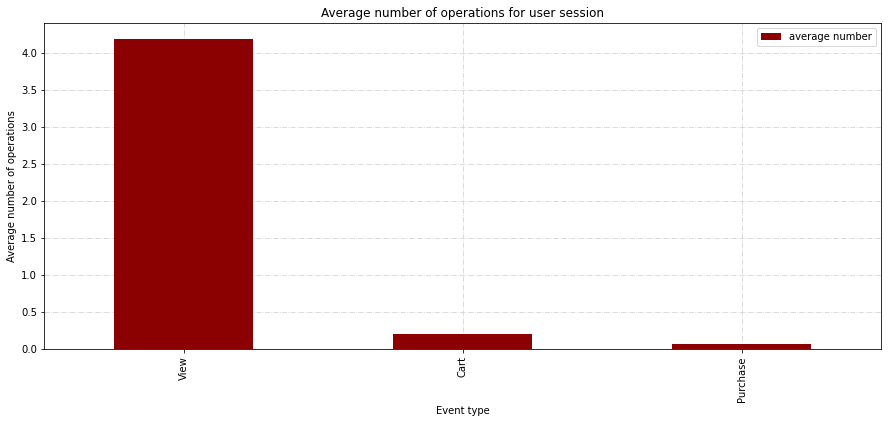

In [689]:
updatelib()
test = functions_.plt_avg_event_session(dfs)

### 1.b
How many times, on average, a user views a product before adding it to the cart?

In [89]:
updatelib()
functions_.avg_view_before_cart(dfs)

3.607123111121696

### 1.c
What’s the probability that products added once to the cart are effectively bought?

In [255]:
def purchase_after_cart_prob(path):
    df = pd.read_csv(path, usecols=['event_type', 'user_id', 'product_id'], iterator=True, chunksize=1000000)
    results = pd.DataFrame()
    cart_purch_num = 0
    cart_total_num = 0
    for frame in df:
        frame['is_cart'] = 0
        frame['is_purchase'] = 0
        frame.loc[frame['event_type'] == 'cart', 'is_cart'] = 1
        frame.loc[frame['event_type'] == 'purchase', 'is_purchase'] = 1
        frame = frame[frame['is_cart'] != 0]
#         frame = frame.groupby('user_id').sum().reset_index()
        results = results.append(frame)
        
    results = results.groupby('user_id').sum()
    cart_purch_num += results[(results['is_purchase'] != 1) & (results['is_cart'] == 1)].shape[0]
    cart_total_num += results[(results['is_cart'] == 1)].shape[0]
    
    return cart_purch_num / cart_total_num

In [241]:
df = pd.read_csv('test.csv', usecols=['event_type', 'user_id', 'product_id'])

df1 = df[:df.shape[0] // 2].copy()
df2 = df[df.shape[0] // 2:].copy()

df1['is_cart'] = 0
df1['is_purchase'] = 0
df1.loc[df1['event_type'] == 'cart', 'is_cart'] = 1
df1.loc[df1['event_type'] == 'purchase', 'is_purchase'] = 1
a1 = df1.groupby('product_id').sum().reset_index()

df2['is_cart'] = 0
df2['is_purchase'] = 0
df2.loc[df2['event_type'] == 'cart', 'is_cart'] = 1
df2.loc[df2['event_type'] == 'purchase', 'is_purchase'] = 1
a2 = df1.groupby('product_id').sum()

b = a1.append(a2).groupby('product_id').sum()


cart_purch_num = b[(b['is_purchase'] != 0) & (b['is_cart'] == 1)].shape[0]
cart_total_num = b[(b['is_cart'] == 1)].shape[0]


cart_purch_num / cart_total_num

0.4666666666666667

In [245]:
cart_purch_num2 = a2[(a2['is_purchase'] != 0) & (a2['is_cart'] == 1)].shape[0]
cart_total_num2 = a2[(a2['is_cart'] == 1)].shape[0]

In [246]:
(cart_purch_num1 + cart_purch_num2) / (cart_total_num1 + cart_total_num2)

0.4666666666666667

In [239]:
df = pd.read_csv('test.csv', usecols=['event_type', 'user_id', 'product_id'])

# df1 = df[:df.shape[0] // 2].copy()
# df2 = df[df.shape[0] // 2:].copy()

df['is_cart'] = 0
df['is_purchase'] = 0
df.loc[df['event_type'] == 'cart', 'is_cart'] = 1
df.loc[df['event_type'] == 'purchase', 'is_purchase'] = 1
a = df.groupby('product_id').sum().reset_index()



cart_purch_num = a[(a['is_purchase'] != 0) & (a['is_cart'] == 1)].shape[0]
cart_total_num = a[(a['is_cart'] == 1)].shape[0]


cart_purch_num / cart_total_num

0.4533333333333333

In [256]:
purchase_after_cart_prob('test.csv')

1.0

### 1.d
What’s the average time an item stays in the cart before being removed?

### 1.e
How much time passes on average between the first view time and a purchase/addition to cart?

In [ ]:
functions.view_purch_avg_time(sample)

In [ ]:
functions_.view_purch_avg_time(nov)

## [RQ2]
What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.

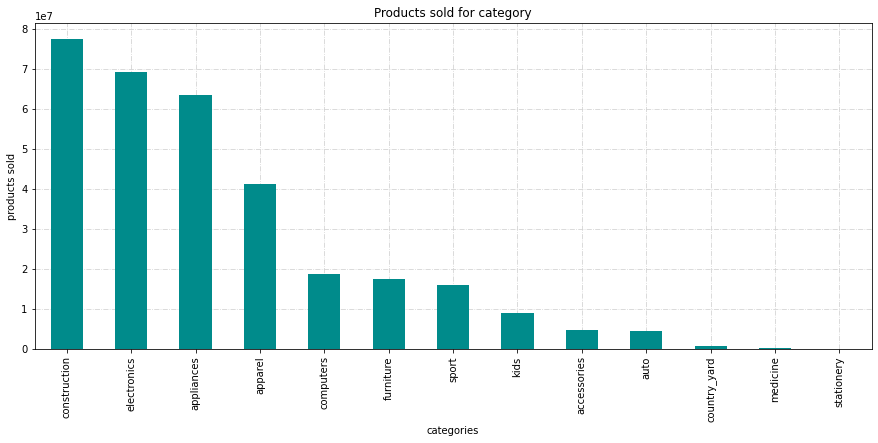

category
construction    77482657
electronics     69201207
appliances      63417883
apparel         41137209
computers       18733089
furniture       17652355
sport           16145807
kids             9128630
accessories      4806168
auto             4645771
country_yard      841274
medicine          276453
stationery        172368
Name: product_id, dtype: int64

In [692]:
updatelib()
functions_.products_for_category(dfs)

### 2.a
Plot the most visited subcategories.

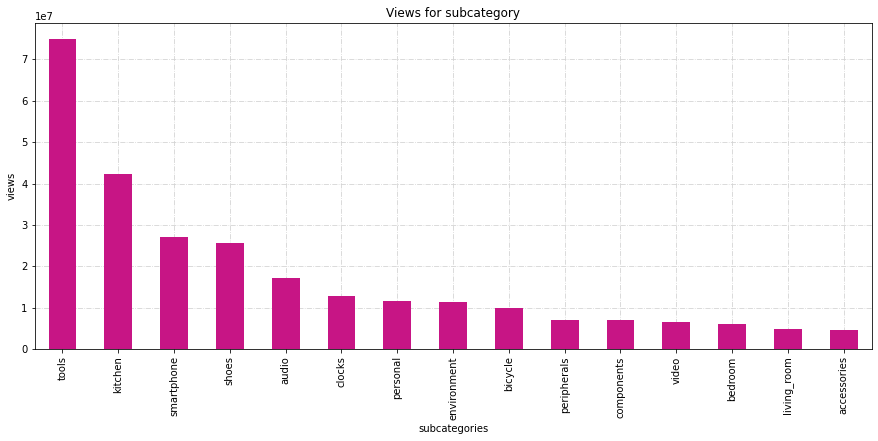

sub_category_1
tools         74948925
kitchen       42402815
smartphone    27110854
shoes         25588984
audio         17231348
                ...   
jacket           33790
belt             17577
watering           143
paper              120
hat                  5
Name: event_type, Length: 63, dtype: int64

In [693]:
updatelib()
functions_.most_viewed_subcategories_month(dfs)

### 2.b
What are the 10 most sold products per category?

#### Observations
For each category of the ecommerce dataframe, we computed the 10 most sold products. We can see this big schema here:

In [695]:
updatelib()
functions_.best_in_cat(dfs)

,category,product_id,event_type
0,accessories,4700478,1669
1,accessories,4700630,1127
2,accessories,4700419,508
3,accessories,16000973,484
4,accessories,16000974,465
...,...,...,...
125,stationery,12900363,42
126,stationery,12900362,41
127,stationery,12900142,41
128,stationery,12901271,37


Anyway, if we are interested in one particular category, we can obviously look at the 10 most sold products within this category. For example, if we want to see the overall best products in the category `electronics`, we can just call the same function with the parameter `cat`.

In [697]:
updatelib()
functions_.best_in_cat(dfs, cat='electronics')

,category,product_id,event_type
70,electronics,1004856,61265
71,electronics,1004767,44419
72,electronics,1005115,34787
73,electronics,4804056,30181
74,electronics,1004833,26183
75,electronics,1002544,22227
76,electronics,1004870,21288
77,electronics,1004249,17971
78,electronics,1005105,15776
79,electronics,1004836,15549


## [RQ3]
For each category, what’s the brand whose prices are higher on average?

### 3.a
Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

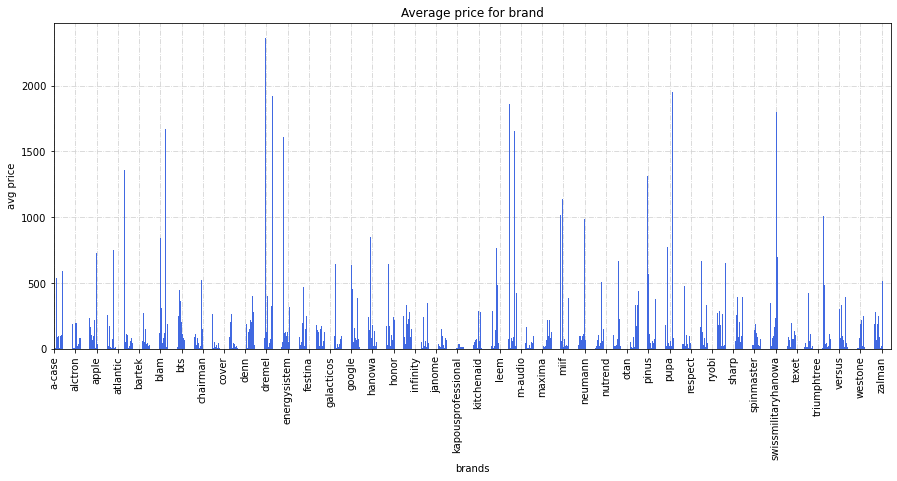

In [701]:
# e.g., if `category = electronics`
updatelib()
functions_.avg_price_cat(dfs, 'electronics')

### 3.b
Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

In [699]:
updatelib()

functions_.highest_price_brands(dfs)

,,price_avg
category,brand,
medicine,jade,267.434079
stationery,dewalt,933.791397
kids,volta,1836.155519
accessories,helix,1878.796081
country_yard,shua,2045.245112
auto,femi,2278.122992
sport,pinarello,2533.238401
computers,cime,2546.216227
appliances,pinarello,2547.260298


## [RQ4]
How much does each brand earn per month?

### 4.a
Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?

In [703]:
updatelib()
all_brands, apple_profits = functions_.monthly_profit_all_brands(dfs, 'apple')

In [704]:
all_brands

,Oct,Nov,Dec,Jan,Feb,Mar,Apr
a-case,275.26,808.32,1039.72,861.96,1335.77,1735.71,6071.23
a-derma,12.36,NaN,95.45,34.19,94.08,96.85,116.86
a-mega,1031.47,908.68,133.85,296.69,432.45,769.66,193.06
abk,69.36,NaN,NaN,NaN,NaN,NaN,NaN
abtoys,324.17,46.31,509.41,NaN,32.90,200.76,586.11
...,...,...,...,...,...,...,...
zhehua,NaN,NaN,NaN,NaN,NaN,NaN,3011.58
zhorya,NaN,NaN,NaN,NaN,NaN,NaN,54.10
zoizoi,NaN,NaN,NaN,NaN,NaN,NaN,24.15
zooexpress,NaN,NaN,NaN,NaN,NaN,NaN,44.30


In [705]:
apple_profits

,Oct,Nov,Dec,Jan,Feb,Mar,Apr
apple,1.112093e+08,1.275125e+08,157396674.9,1.258441e+08,1.917556e+08,1.413153e+08,74288067.38


### 4.b
Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing both the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

In [710]:
updatelib()
functions_.top_losses(all_brands)

apple lost 47.43% between Mar and Apr
samsung lost 22.37% between Dec and Jan
xiaomi lost 29.05% between Feb and Mar


## [RQ5]
In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of
the week show the hourly average of visitors your store has.

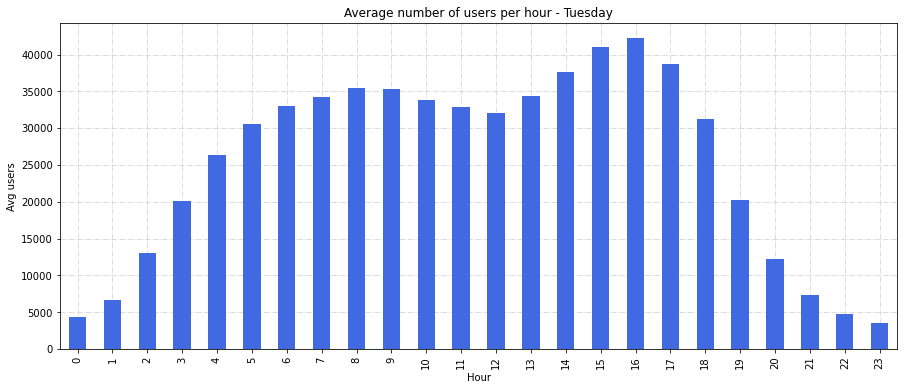

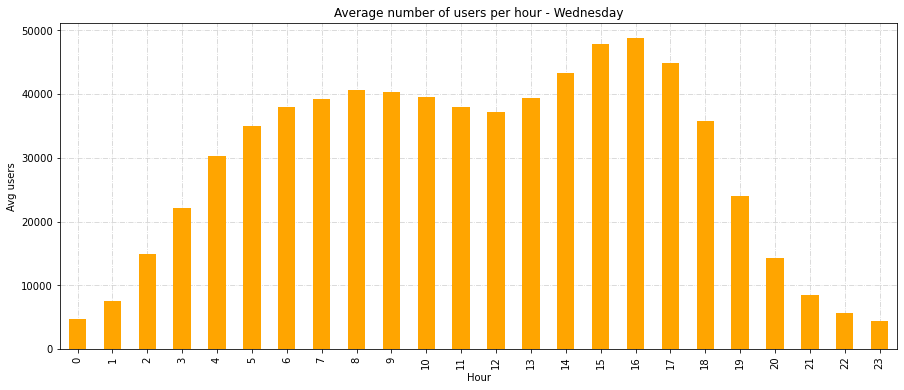

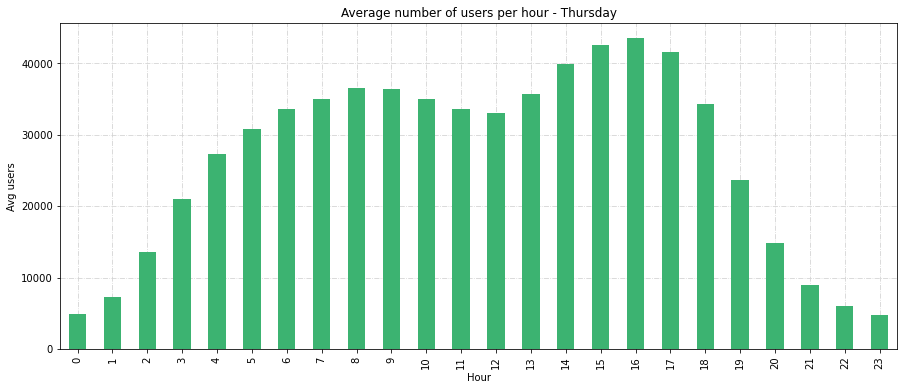

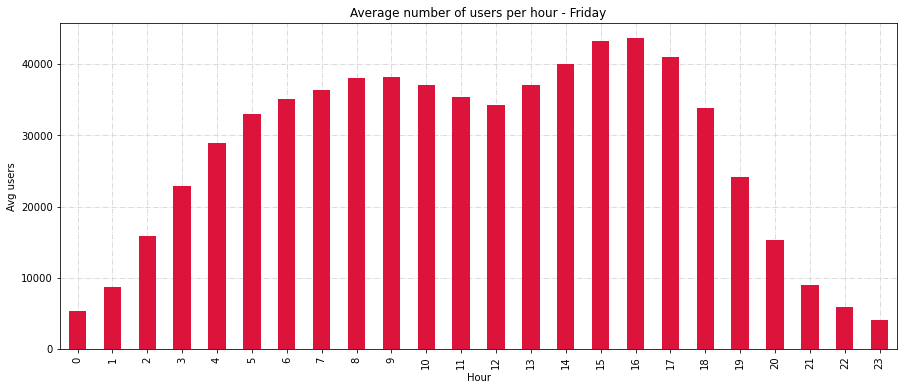

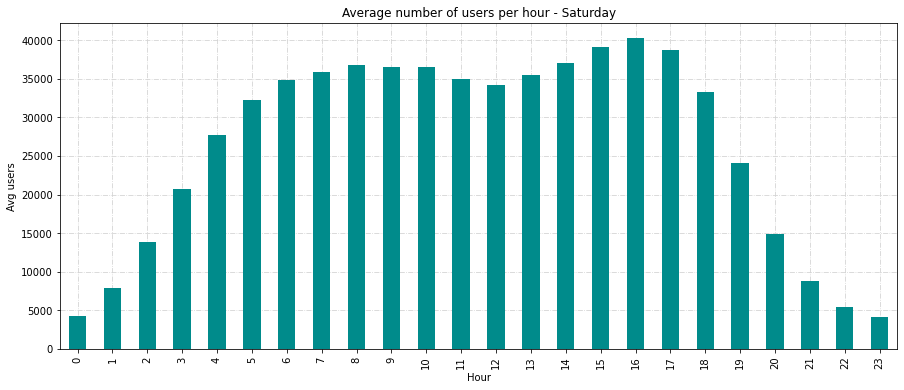

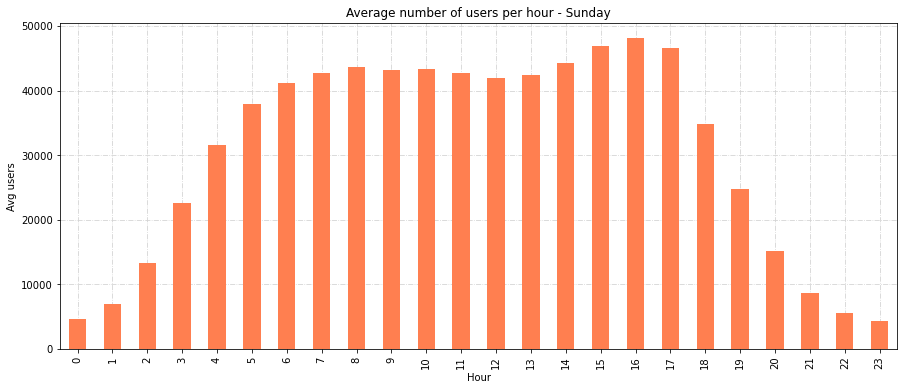

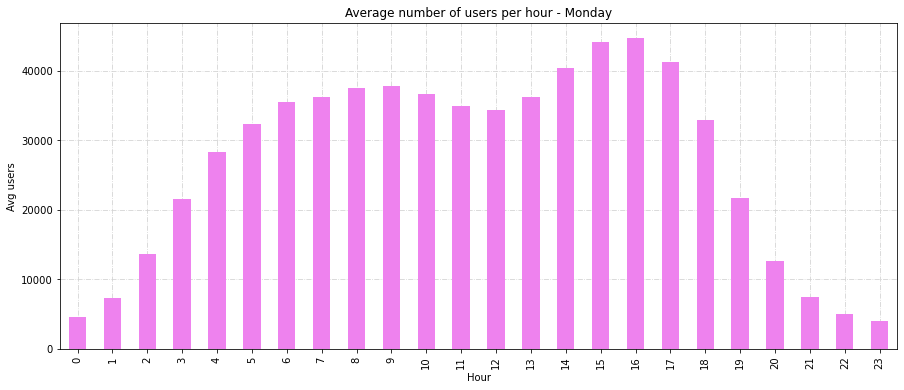

In [803]:
updatelib()
week_days = functions_.avg_users(dfs)

## [RQ6]
The conversion rate of a product is given by the purchase rate over the number of times the product has been visited. What's the conversion rate of your online store?

### 6.a
Find the overall conversion rate of your store.

In [712]:
updatelib()
functions_.conversion_rate(dfs)

0.017754711458446676

### 6.b
Plot the purchase rate of each category and show the conversion rate of each category in decreasing order.

<Figure size 432x288 with 0 Axes>

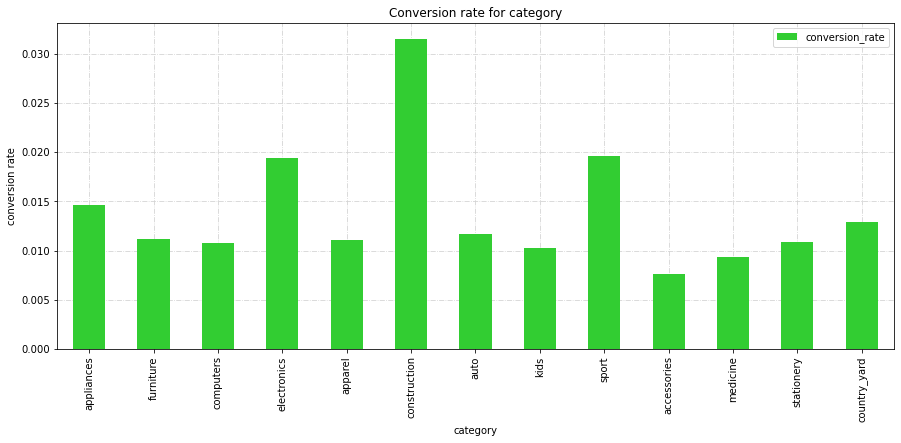

,conversion_rate
appliances,0.014598
furniture,0.011187
computers,0.010804
electronics,0.019380
apparel,0.011070
construction,0.031520
auto,0.011668
kids,0.010271
sport,0.019587
accessories,0.007668


In [713]:
updatelib()
functions_.category_conv_rate(dfs)

## [RQ7]
The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your
customers.

Prove that the pareto principle applies to your store.

In [714]:
print('20% of the users in the ecommerce provide for {:.2f} of the entire business.'.format(functions_.pareto_principle(dfs)))

20% of the users in the ecommerce provide for 74.55 of the entire business.


In [715]:
print('25% of the users in the ecommerce provide for {:.2f} of the entire business.'.format(functions_.pareto_principle(dfs, 25)))

25% of the users in the ecommerce provide for 79.30 of the entire business.


#### Observations

As we can see in the previous cells, the Pareto principle is respected (with a 75/25 ratio).

Moreover, we can also analyze the behaviour with respect to the percentage of users considered. If we look at the plot below, we can see that 10% of the users already provide for more than half of the whole business. Also, from the 50% point on, we can see that the whole business is almost completely conducted by the first half of the users.

In [716]:
updatelib()
functions_.plot_pareto(dfs)

KeyboardInterrupt: 